# Buoc 1: Load du lieu

In [31]:
# Import necessary modules
from ssi_fc_data import fc_md_client, model
import pandas as pd  # Import Pandas for DataFrame handling
import json
import configDataSSL

# Create a Market Data Client
from_date = "20/12/2023"
to_date = "11/01/2024"
client = fc_md_client.MarketDataClient(configDataSSL)

req = model.daily_ohlc('VCB', from_date, to_date)

data_dict = client.daily_ohlc(configDataSSL, req)
print(type(data_dict))
# Access the list of dictionaries in the "data" field
data_list = data_dict['data']
print(data_list)
# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)

# Print or work with the DataFrame
print(data)

<class 'dict'>
[{'Symbol': 'VCB', 'Market': 'HOSE', 'TradingDate': '20/12/2023', 'Time': None, 'Open': '81200', 'High': '81300', 'Low': '80500', 'Close': '81100', 'Volume': '1872300', 'Value': '151412890000.0010'}, {'Symbol': 'VCB', 'Market': 'HOSE', 'TradingDate': '21/12/2023', 'Time': None, 'Open': '81000', 'High': '81000', 'Low': '80300', 'Close': '80900', 'Volume': '2030300', 'Value': '163668459999.9990'}, {'Symbol': 'VCB', 'Market': 'HOSE', 'TradingDate': '22/12/2023', 'Time': None, 'Open': '80900', 'High': '81100', 'Low': '80400', 'Close': '80900', 'Volume': '1579800', 'Value': '127435990000.0010'}, {'Symbol': 'VCB', 'Market': 'HOSE', 'TradingDate': '25/12/2023', 'Time': None, 'Open': '80900', 'High': '81800', 'Low': '80700', 'Close': '81800', 'Volume': '1301600', 'Value': '106015319999.9990'}, {'Symbol': 'VCB', 'Market': 'HOSE', 'TradingDate': '26/12/2023', 'Time': None, 'Open': '82000', 'High': '82800', 'Low': '82000', 'Close': '82800', 'Volume': '971200', 'Value': '80092999999

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       16 non-null     object
 1   Market       16 non-null     object
 2   TradingDate  16 non-null     object
 3   Time         0 non-null      object
 4   Open         16 non-null     object
 5   High         16 non-null     object
 6   Low          16 non-null     object
 7   Close        16 non-null     object
 8   Volume       16 non-null     object
 9   Value        16 non-null     object
dtypes: object(10)
memory usage: 1.4+ KB


# Buoc 2: Viet ham de check chien luoc (Viet 3 ham kiem tra du lieu)

In [33]:
import pandas as pd
# data o tren

data['TradingDate'] = pd.to_datetime(data['TradingDate'], dayfirst=True)
data.set_index('TradingDate', inplace=True)
# Giả sử 'data' là DataFrame của bạn với dữ liệu lịch sử giá cổ phiếu
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Định nghĩa hàm để kiểm tra nến Doji chân dài
def is_long_legged_doji(row):
    body_range = abs(row['Close'] - row['Open']) # Doji khong phan biet Open > Close hay Close > Open
    upper_shadow = row['High'] - max(row['Open'], row['Close'])
    lower_shadow = min(row['Open'], row['Close']) - row['Low']
    # Điều chỉnh ngưỡng này theo dữ liệu cụ thể của bạn
    doji_threshold = 0.1 / 100 * row['Close']
    return body_range <= doji_threshold and upper_shadow >= 2 * body_range and lower_shadow >= 2 * body_range

# Định nghĩa hàm để kiểm tra nến tăng
def is_bullish_candle(current_row, previous_row):
    return (current_row['Close'] > current_row['Open'] and
            current_row['Close'] > previous_row['Close'] and
            previous_row['Close'] <= previous_row['Open'])

# Định nghĩa hàm để kiểm tra nến giảm
def is_bearish_candle(current_row, previous_row):
    return (current_row['Close'] < current_row['Open'] and
            current_row['Close'] < previous_row['Close'] and
            previous_row['Close'] >= previous_row['Open'])

# Lặp qua DataFrame 2 record cuối cùng để kiểm tra chiến lược mua
buy_signals = []
sell_signals = []

for i in range(0, len(data)): # Chi lay 2 nen
    current_row = data.iloc[i]
    previous_row = data.iloc[i - 1]
    
    # Kiểm tra nến hiện tại có phải là nến tăng và nếu nến trước đó là nến Doji chân dài
    if is_bullish_candle(current_row, previous_row) and is_long_legged_doji(previous_row):
        # Nếu thỏa mãn cả ba điều kiện, thêm ngày vào danh sách tín hiệu mua
        buy_signals.append(current_row.name)  # .name sẽ lấy chỉ số (ngày) của hàng
        # data['Buy_Signal'] = 'Buy'
        # data.at[i, 'Buy_Signal'] = 'Buy'
    if is_bearish_candle(current_row, previous_row) and is_long_legged_doji(previous_row):
        sell_signals.append(current_row.name)
        # data['Sell_Signal'] = 'Sell'
        # data.at[i, 'Sell_Signal'] = 'Sell'

# In ra danh sách các tín hiệu mua
print("Buy signals " + from_date + " to " + to_date + " on dates:\n", buy_signals)
print("Sell signals on dates:\n", sell_signals)

Buy signals 20/12/2023 to 11/01/2024 on dates:
 [Timestamp('2023-12-25 00:00:00')]
Sell signals on dates:
 []


In [34]:
data

,Symbol,Market,Time,Open,High,Low,Close,Volume,Value
TradingDate,,,,,,,,,
2023-12-20,VCB,HOSE,None,81200,81300,80500,81100,1872300,151412890000.0010
2023-12-21,VCB,HOSE,None,81000,81000,80300,80900,2030300,163668459999.9990
2023-12-22,VCB,HOSE,None,80900,81100,80400,80900,1579800,127435990000.0010
2023-12-25,VCB,HOSE,None,80900,81800,80700,81800,1301600,106015319999.9990
2023-12-26,VCB,HOSE,None,82000,82800,82000,82800,971200,80092999999.9999
2023-12-27,VCB,HOSE,None,82900,83200,82500,82700,899600,74619730000.0004
2023-12-28,VCB,HOSE,None,82700,83100,82400,82800,703200,58196770000.0002
2023-12-29,VCB,HOSE,None,83500,83900,80300,80300,1621700,134778570000.0010
2024-01-02,VCB,HOSE,None,82900,83600,82200,83500,1785800,148183830000


# Buoc 3: Show nen len de xem

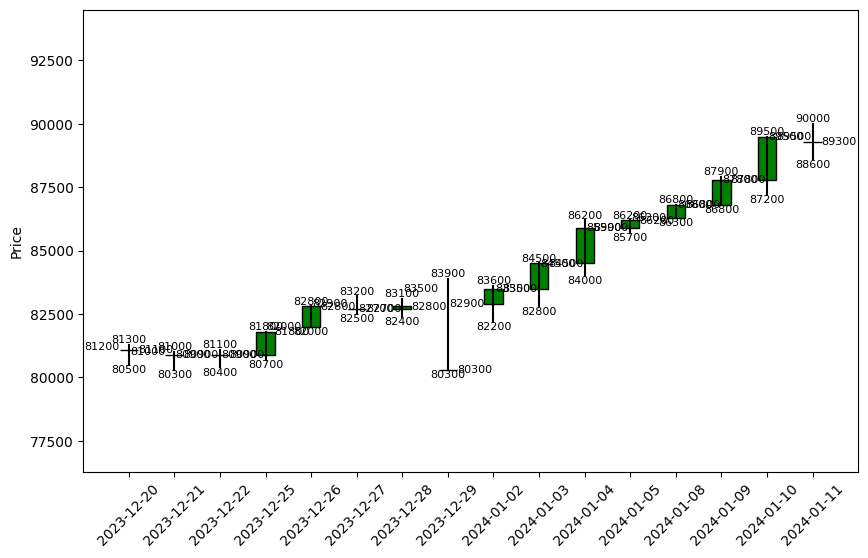

In [35]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def draw_candlestick_with_labels(ax, data):
    # Sử dụng enumerate để nhận vị trí chỉ số và dữ liệu hàng
    for i, (index, row) in enumerate(data.iterrows()):
        # Xác định màu sắc dựa trên giá Open và Close
        color = 'green' if row['Open'] <= row['Close'] else 'red'
        
        # Vẽ bóng nến (High và Low)
        ax.plot([i, i], [row['Low'], row['High']], color='black')
        
        # Vẽ thân nến (Open và Close)
        body_height = max(row['Close'] - row['Open'], 0.01)  # Đảm bảo có chiều cao tối thiểu
        body_bottom = min(row['Close'], row['Open'])
        open_close_rect = plt.Rectangle((i - 0.2, body_bottom), 0.4, body_height, 
                                        facecolor=color, edgecolor='black')
        ax.add_patch(open_close_rect)
        
        # Thêm nhãn giá
        ax.text(i, row['High'], f"{row['High']}", va='bottom', ha='center', fontsize=8)
        ax.text(i, row['Low'], f"{row['Low']}", va='top', ha='center', fontsize=8)
        ax.text(i - 0.2, row['Open'], f"{row['Open']}", va='center', ha='right', fontsize=8)
        ax.text(i + 0.2, row['Close'], f"{row['Close']}", va='center', ha='left', fontsize=8)

# Khởi tạo plot
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ các nến với nhãn từ DataFrame
draw_candlestick_with_labels(ax, data)

# Thiết lập giới hạn cho biểu đồ
ax.set_xlim(-1, len(data))
ax.set_ylim(data['Low'].min() * 0.95, data['High'].max() * 1.05)  # Đặt giới hạn với một chút đệm

# Thiết lập nhãn cho trục x
ax.set_xticks(range(len(data)))
ax.set_xticklabels([index.strftime('%Y-%m-%d') for index in data.index], rotation=45)
ax.set_ylabel('Price')

# Hiển thị plot
plt.show()
